# Minimize experiments

## Minimize the Rosenbrock function

$$ f(x) = \sum_{d=1:D-1} 100 (x_{d+1} - x_d^a)^2 + (1-x_d)^2 $$

In [1]:
from minimize import line_search, kalman_filter_smoother
from helpers import plot_linesearch
import matplotlib.pyplot as plt

import os
from datetime import datetime

In [77]:
import autograd.numpy as np
from autograd import grad


def convert_to_1d_objective(f, x, d):
    """
    Converts a multivariate objective function f to the univariate function
    
        g(a) = f(x + a * d),
        
    handling the derivatives as well.
    """
    
    def g(a):
        
        ga, dfa = f(x + a * d)
        
        dga = np.dot(dfa, d)
        
        return np.array([[ga, dga]])
    
    return g
    

def rosenbrock(x, a):
    
    def f(x, a):
        return np.sum(100 * (x[1:] - x[:-1] ** a) ** 2 + (1 - x[:-1]) ** 2)
    
    df = grad(f, argnum=0)
    
    fx = f(x, a)
    dfx = df(x, a)
    
    return fx, dfx

In [78]:
x = np.ones(shape=(2,))

print(rosenbrock(x, 2))

standard_rosenbrock = lambda x : rosenbrock(x, a=2)

linesearch_objective = convert_to_1d_objective(standard_rosenbrock, x, d=x)

print(linesearch_objective(x))

(0.0, array([0., 0.]))
[[ 401. 1202.]]


In [79]:
def conjugate_gradients(objective, x0, c1, c2, wp_thresh, save_path):
    
    t0 = 0.
    t_guess = np.array([1.])
    num_dim = x0.shape[0]
            
    f, df = objective(x0)
    
    d = - df
    g = df
    diff = None
    
    x = x0
    xhist = [x]
    fhist = [f]
    
    names = ['t', 'y', 'wp_probs', 'mf', 'Vf', 'ms', 'Vs', 'iVC', 'post_probs']
    os.mkdir(f'{os.getcwd()}/{save_path}')
    
    print(save_path)
    
    for i in range(100):
        
        linesearch_objective = convert_to_1d_objective(objective, x, d)
        
        # Create y0 array
        y0 = np.array([[f, np.dot(df, d)]])
        
        if not (diff is None): t_guess = np.abs(diff / y0[0, 1])
        
        t, y, wp_probs, mf, Vf, ms, Vs, iVC, post_probs = line_search(objective=linesearch_objective,
                                                                      c1=c1,
                                                                      c2=c2,
                                                                      wp_thresh=wp_thresh,
                                                                      t0=t0,
                                                                      y0=y0,
                                                                      t_guess=t_guess)
            
        os.mkdir(f'{os.getcwd()}/{save_path}/{str(i).zfill(5)}')
        
        for name, array in zip(names, [t, y, wp_probs, mf, Vf, ms, Vs, iVC, post_probs]):
            np.save(f'{os.getcwd()}/{save_path}/{str(i).zfill(5)}/{name}.npy', array)
            
#         if t.shape[0] >= 8:
#             plot_linesearch(c1=c1,
#                             c2=c2,
#                             t_data=t,
#                             mf=mf,
#                             Vf=Vf,
#                             ms=ms,
#                             Vs=Vs,
#                             iVC=iVC,
#                             post_probs=post_probs,
#                             wp_probs=wp_probs,
#                             x=None,
#                             y=y)
        
        idx_best = np.argmax(wp_probs)
        alpha = float(t[idx_best+1])
        
        print(f'step {i:3d} objective {fhist[-1]} alpha {alpha}')
        
        # Update x
        x = x + alpha * d
        f_, df_ = objective(x)
        
        # Update d and df
        beta = np.dot(df_, (df_ - df)) / np.dot(df, df)
        
        if False: # i > 0 and i % x.shape[0] == 0
            d = - df_
        else:
            d = - df_ + beta * d
            
        # Ensure searching in direction of decreasing objective
        if np.dot(d, df_) > 0.:
            d = - d
            
        diff = np.array([f_ - f])
        
        f = f_
        df = df_
        
        xhist.append(x)
        fhist.append(f)
        
    return np.array(xhist)

2020-12-09--16-13-48
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   5 points
Executing linesearch loop, with   6 points
step   0 objective 99.0 alpha 0.006062887844703019
Executing linesearch loop, with   2 points


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:621: UserWarning: wolfe_powell var was 0.0. Treating this as 0, manually.
  


Executing linesearch loop, with   3 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   5 points
Executing linesearch loop, with   7 points
step   1 objective 98.01985935632199 alpha 0.03828909814334426
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   8 points
step   2 objective 97.95874824139983 alpha 0.0028974623290100704
Executing linesearch loop, with   2 points
step   3 objective 97.79488274737633 alpha 0.011162166997022821
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step   4 objective 97.74222334262645 alpha 0.013427430120370015
Executing linesearch loop, with   2 points
step   5 objective 97.66547605295052 alpha 0.007199014084352995
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   8 points
Executing linesearch loop, with  16 points
<class 'tuple'>


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:772: RuntimeWarning: invalid value encountered in sqrt
  zorder=2,


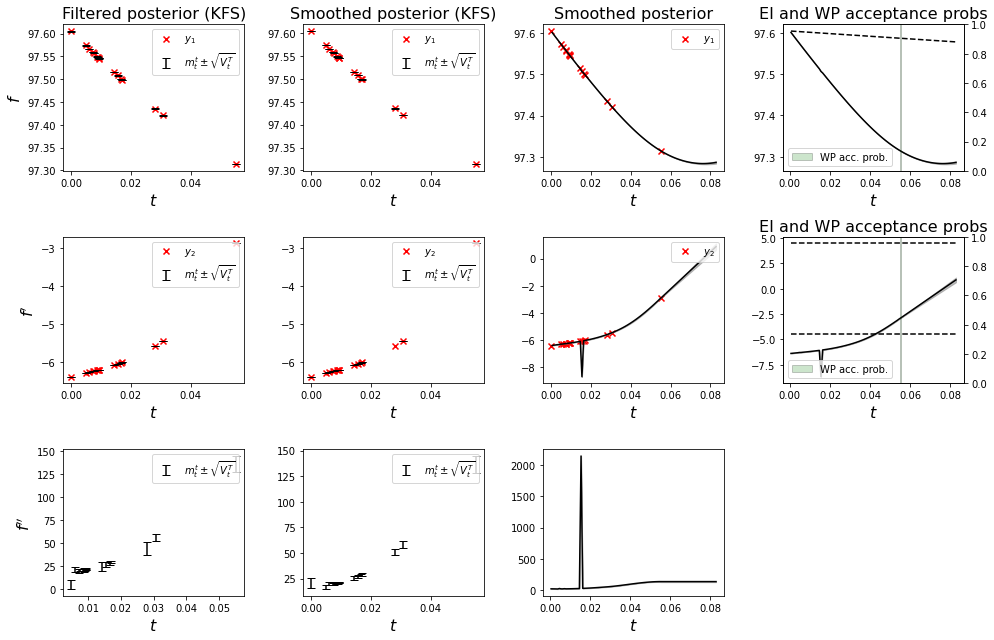

step   6 objective 97.60495617326059 alpha 0.05523954693094138
Executing linesearch loop, with   2 points
step   7 objective 97.31316555949272 alpha 0.0063797440301574535
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points
step   8 objective 97.06012048412643 alpha 0.004300307225364222
Executing linesearch loop, with   2 points
step   9 objective 96.98537312236063 alpha 0.006674005215854776
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   8 points
Executing linesearch loop, with  16 points
<class 'tuple'>


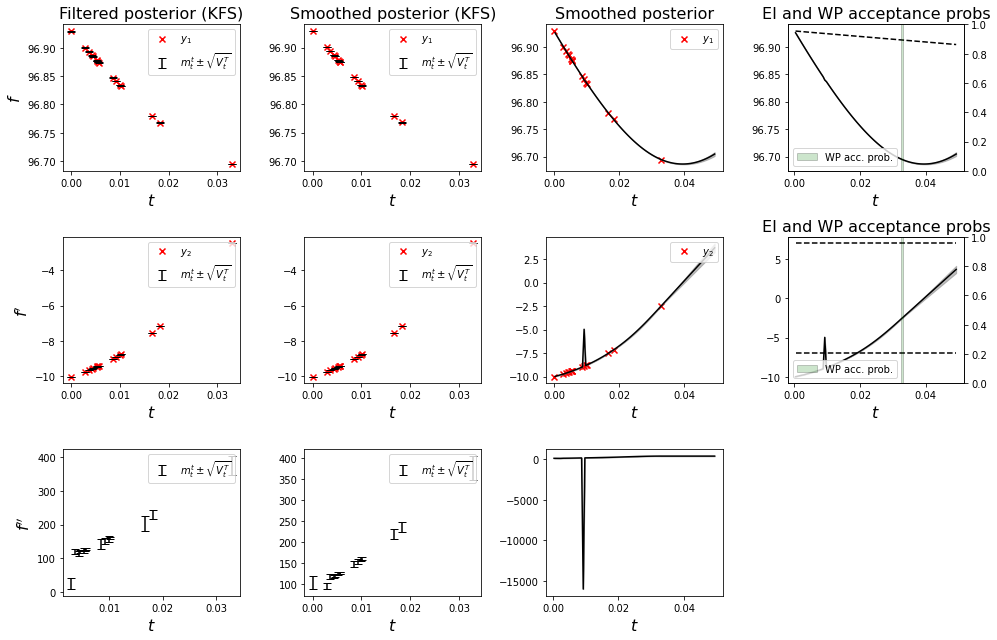

step  10 objective 96.92888349849497 alpha 0.032895000512622063
Executing linesearch loop, with   2 points
step  11 objective 96.69429146955999 alpha 0.005575436759168838
Executing linesearch loop, with   2 points
step  12 objective 96.50047330935158 alpha 0.003118853076864244
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points
step  13 objective 96.34427350650981 alpha 0.006036613901387552
Executing linesearch loop, with   2 points
step  14 objective 96.31704948582701 alpha 0.0034252414725495367
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   8 points
Executing linesearch loop, with  16 points
<class 'tuple'>


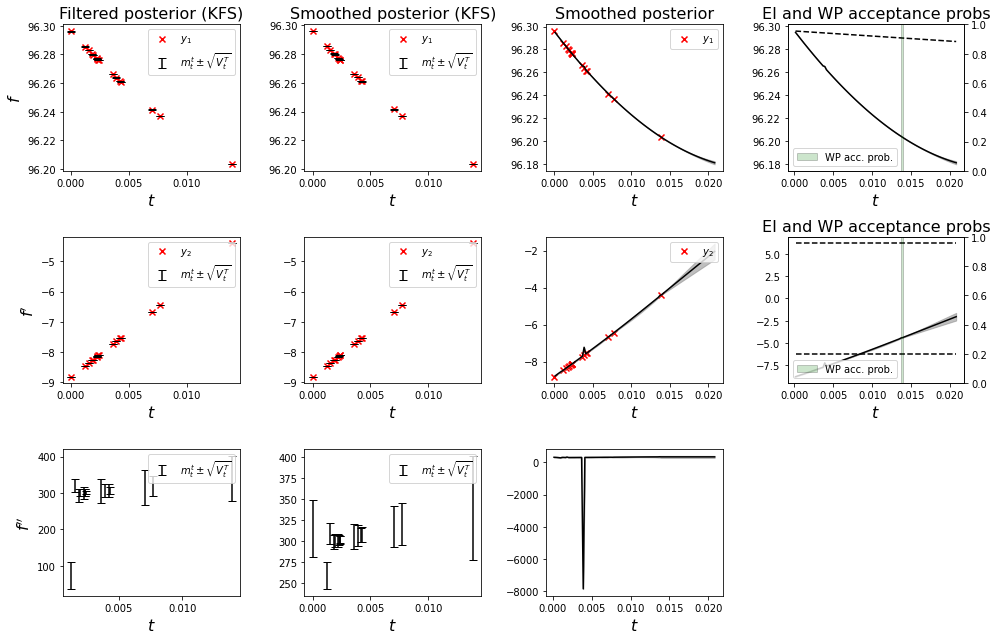

step  15 objective 96.29605164749738 alpha 0.013885905220619015
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   8 points
step  16 objective 96.20344328944866 alpha 0.0065511873277940315
Executing linesearch loop, with   2 points
step  17 objective 95.9521469157005 alpha 0.0058739040212241415
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  18 objective 95.74331670875543 alpha 0.0062355993544706565
Executing linesearch loop, with   2 points
step  19 objective 95.47093494699335 alpha 0.0034066682149638838
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  20 objective 95.31375351822349 alpha 0.002548758847999026
Executing linesearch loop, with   2 points
step  21 objective 95.08467468263643 alpha 0.0024526641399891616
Executing linesearch loop, with   2 points
step  22 objective 94.91945948854502 alpha 0.003961781767333599
Executing l

/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:772: RuntimeWarning: invalid value encountered in sqrt
  zorder=2,


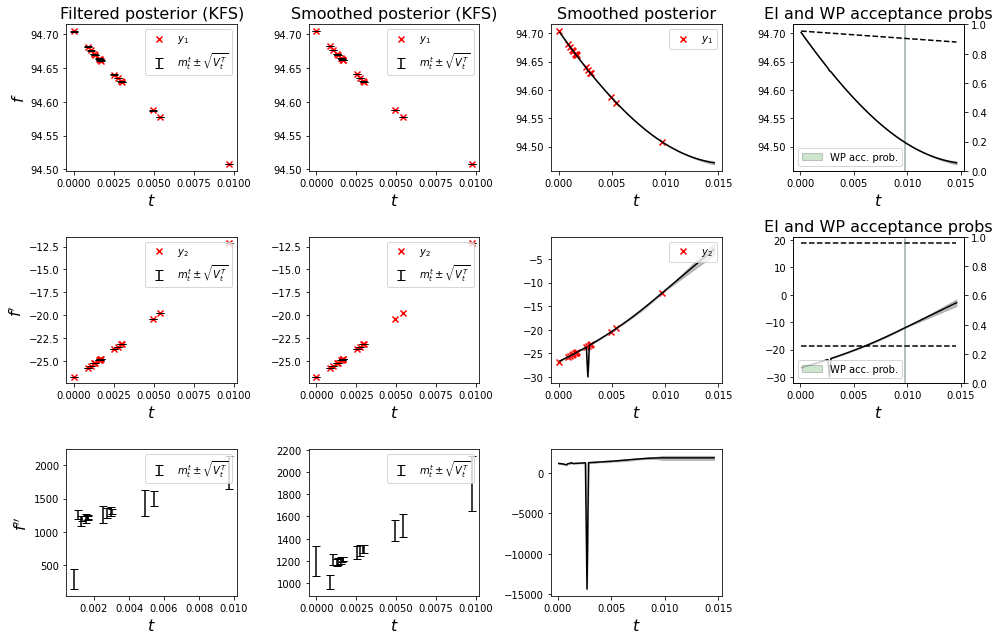

step  28 objective 94.70413646990484 alpha 0.009732079041114923
Executing linesearch loop, with   2 points
step  29 objective 94.50789917853642 alpha 0.0013829695198902625
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points
step  30 objective 94.34114602228809 alpha 0.0012105529034094284
Executing linesearch loop, with   2 points
step  31 objective 94.29969847719818 alpha 0.0017435245222282838
Executing linesearch loop, with   2 points
step  32 objective 94.2660773641286 alpha 0.003846726182310396
Executing linesearch loop, with   2 points
step  33 objective 94.23779893233689 alpha 0.003217772292712077
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  34 objective 94.21561480402146 alpha 0.0034563296388447342
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  35 objective 94.18417153861195 alpha 0.002861362144735126
Executing linesearch loop, with   2 points
Executing li

/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:772: RuntimeWarning: invalid value encountered in sqrt
  zorder=2,


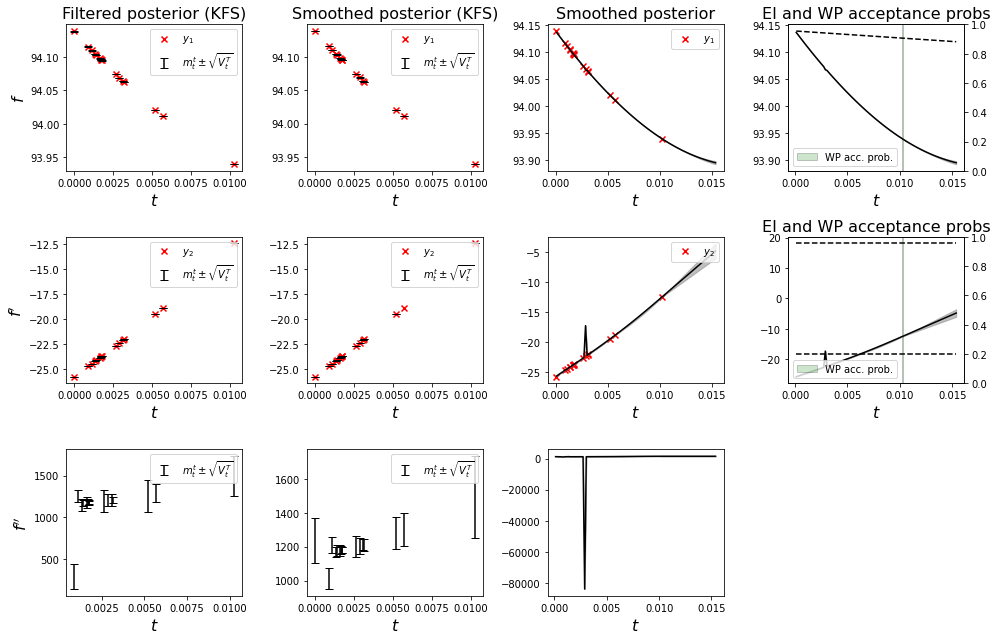

step  36 objective 94.13880286718634 alpha 0.010258948320601102
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  37 objective 93.93926572137433 alpha 0.0017866273928580439
Executing linesearch loop, with   2 points
step  38 objective 93.63721253199209 alpha 0.0016997603292968999
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points
step  39 objective 93.52367586948488 alpha 0.00043601772787962205
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   8 points
Executing linesearch loop, with  16 points
<class 'tuple'>


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:772: RuntimeWarning: invalid value encountered in sqrt
  zorder=2,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:803: RuntimeWarning: invalid value encountered in sqrt
  color='gray', alpha=0.5)
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:804: RuntimeWarning: invalid value encountered in sqrt
  


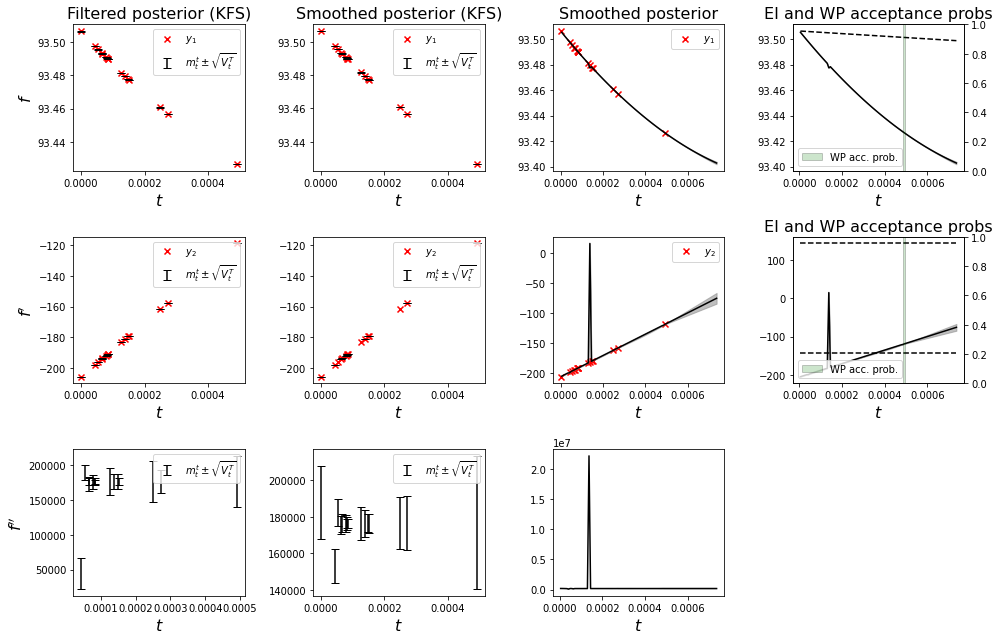

step  40 objective 93.50636436050357 alpha 0.0004910149573707085
Executing linesearch loop, with   2 points
step  41 objective 93.42667480336642 alpha 0.0018490007586529462
Executing linesearch loop, with   2 points
step  42 objective 93.38141091414003 alpha 0.001848641095769736
Executing linesearch loop, with   2 points
step  43 objective 93.34507431391428 alpha 0.0031178650897836797
Executing linesearch loop, with   2 points
step  44 objective 93.3179895896496 alpha 0.0013195758146013613
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   8 points
step  45 objective 93.29756623615002 alpha 0.007321745236802515
Executing linesearch loop, with   2 points
step  46 objective 93.24706972884587 alpha 0.0013285656756569972
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  47 objective 93.20470201508276 alpha 0.007753418669216475
Executing linesearch loop, with   2 points
step  48 ob

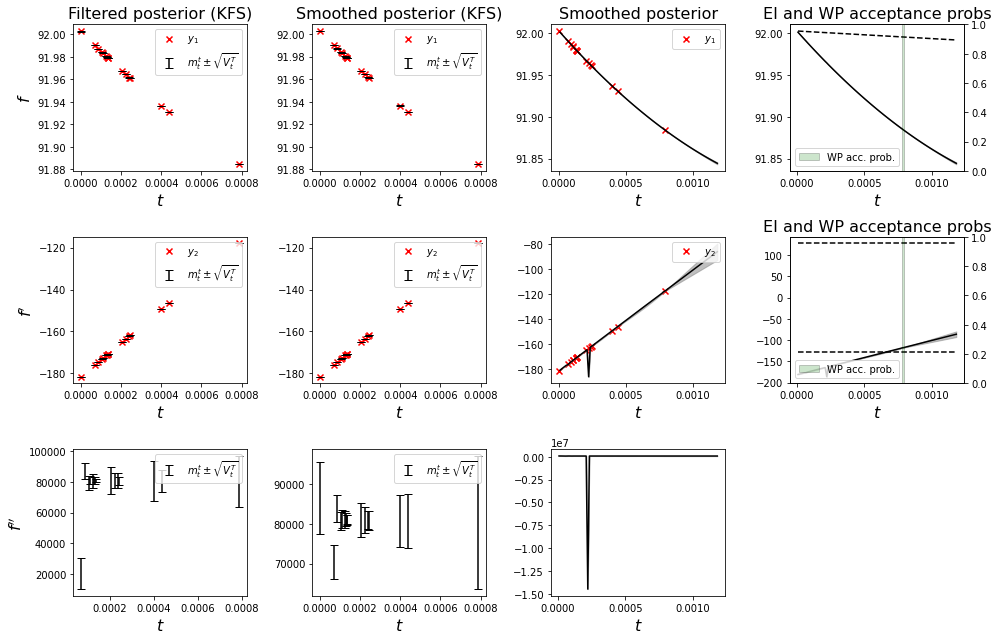

step  56 objective 92.00271554504558 alpha 0.0007888693732224932
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  57 objective 91.88455936067015 alpha 0.0026737798781024855
Executing linesearch loop, with   2 points
step  58 objective 91.72029266060254 alpha 0.004959073347310295
Executing linesearch loop, with   2 points
step  59 objective 91.64912838940612 alpha 0.000781552530409196
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points
step  60 objective 91.59480694468888 alpha 0.0009095526595266536
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
Executing linesearch loop, with   8 points
step  61 objective 91.58100071517909 alpha 0.005924995640459217
Executing linesearch loop, with   2 points
step  62 objective 91.5472366551465 alpha 0.002130973929900842
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  63 objective 91.521995587307

/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:772: RuntimeWarning: invalid value encountered in sqrt
  zorder=2,


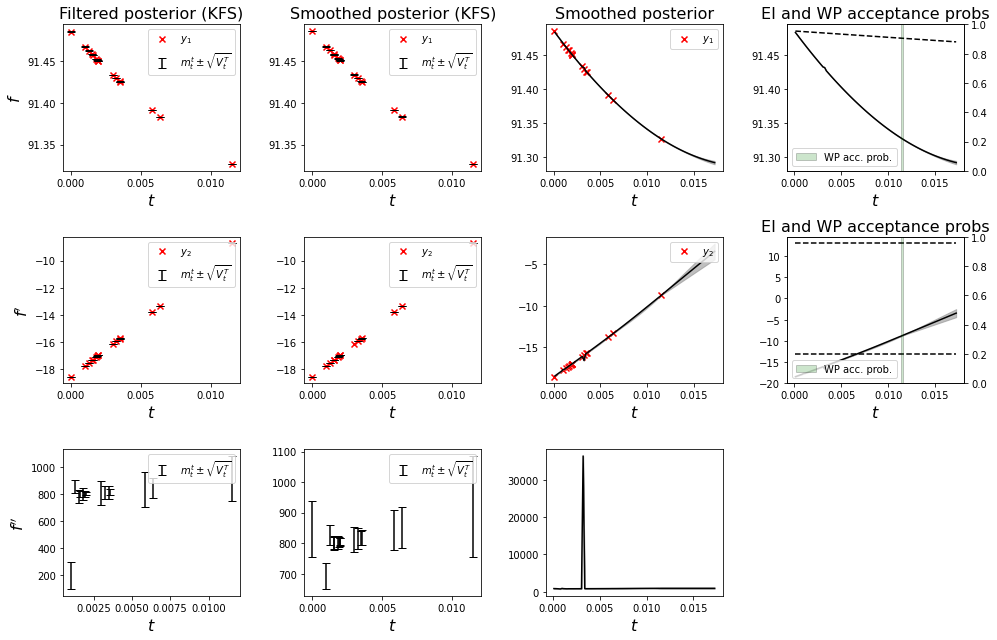

step  64 objective 91.48542156038249 alpha 0.011509090123805955
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  65 objective 91.32682301867753 alpha 0.0014518635447890388
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points
step  66 objective 91.09040092364147 alpha 0.0013090479103934284
Executing linesearch loop, with   2 points
step  67 objective 91.0190450296676 alpha 0.0018873374782025483
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  68 objective 90.9783963229398 alpha 0.0018402571196869848
Executing linesearch loop, with   2 points
step  69 objective 90.92216930884554 alpha 0.002452942346019762
Executing linesearch loop, with   2 points
step  70 objective 90.89915407640763 alpha 0.0010822002476097454
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  71 objective 90.8830837559632 alpha 0.0008395833894954927
Executing li

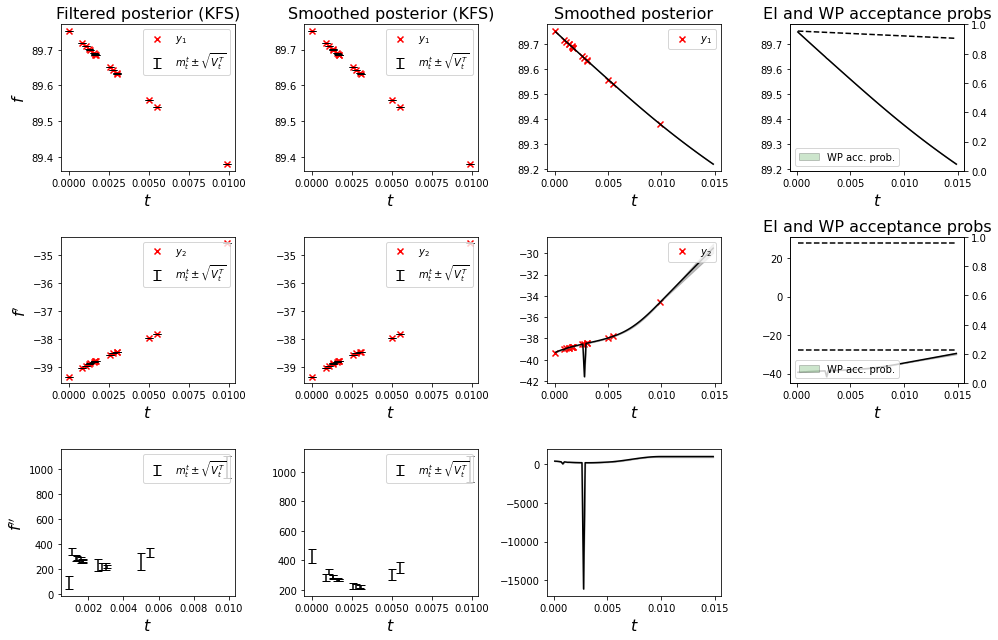

Executing linesearch loop, with  32 points
<class 'tuple'>


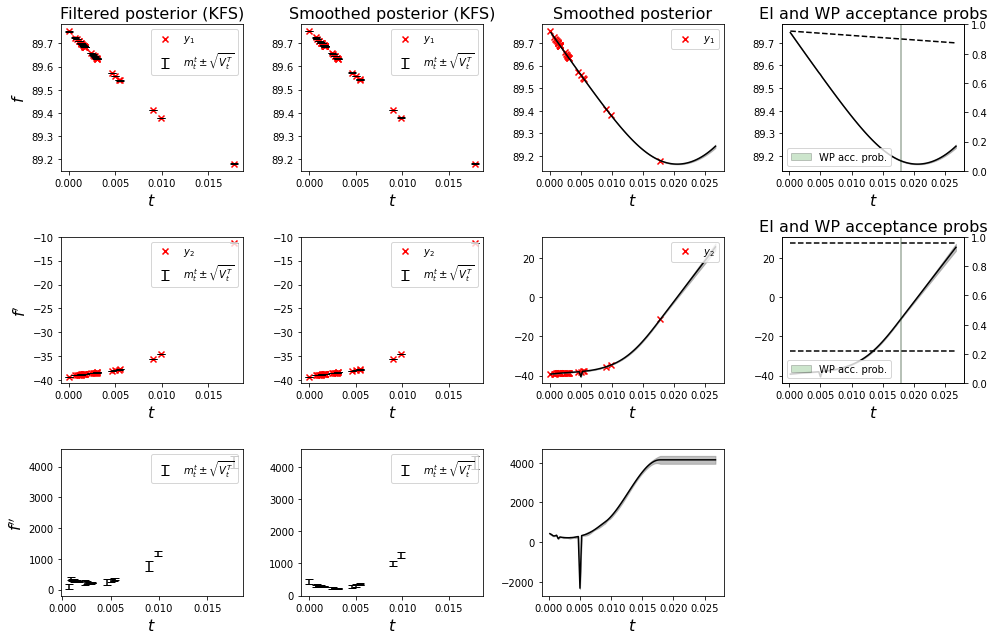

step  89 objective 89.75196430026688 alpha 0.017822026740594927
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points
step  90 objective 89.17742869425676 alpha 0.0002620422294147427
Executing linesearch loop, with   2 points
step  91 objective 89.10974926373491 alpha 0.00027063488675897464
Executing linesearch loop, with   2 points
step  92 objective 89.0524895288773 alpha 0.0005915335036183997
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points
step  93 objective 89.00418245691436 alpha 0.0015831724207205178
Executing linesearch loop, with   2 points
step  94 objective 88.93662370528608 alpha 0.0022250385171455247
Executing linesearch loop, with   2 points
step  95 objective 88.89612335885892 alpha 0.0008210792559248823
Executing linesearch loop, with   2 points
step  96 objective 88.8654060827931 alpha 0.0047289993335116335
Executing linesearch loop, with   2 points
step  97 objective 88.84474852120243 alpha 0.0008424

In [80]:
c1 = 0.05
c2 = 0.7
wp_thresh = 0.95

ndim = 100
x0 = np.zeros(shape=(ndim,))

standard_rosenbrock = lambda x : rosenbrock(x, a=2)

save_path = datetime.now().strftime('%Y-%m-%d--%H-%M-%S')

xhist = conjugate_gradients(objective=standard_rosenbrock,
                            x0=x0,
                            c1=c1,
                            c2=c2,
                            wp_thresh=wp_thresh, 
                            save_path=save_path)

In [ ]:
# plt.figure(figsize=(8, 8))

# eps = 2.

# x1, x2 = np.meshgrid(np.linspace(1. - eps, 1 + eps, 40), np.linspace(1. - eps, 1. + eps, 40))
# x = np.stack([x1, x2], axis=-1)
# x = np.reshape(x, (-1, 2))

# f = np.array([standard_rosenbrock(x_)[0] for x_ in x])
# f = np.reshape(f, (x1.shape[0], x1.shape[0]))

# plt.contourf(x1, x2, np.log(f) + 1e-6, cmap='coolwarm', alpha=0.5)
# plt.plot(xhist[:, 0], xhist[:, 1], color='black')
# plt.gca().set_aspect('equal')
# plt.xlim([1. - eps, 1. + eps])
# plt.ylim([1. - eps, 1. + eps])
# plt.show()

In [ ]:
# import scipy as scp

# ndim = 10
# x0 = np.zeros(shape=(ndim,))

# standard_rosenbrock_f = lambda x : rosenbrock(x, a=10)[0]
# standard_rosenbrock_df = lambda x : rosenbrock(x, a=10)[1]

# scp.optimize.minimize(fun=standard_rosenbrock_f,
#                       x0=x0,
#                       method='CG',
#                       jac=standard_rosenbrock_df,
#                       options={'maxiter' : 1000})

# Plotting searches



In [ ]:
i = 0

names = ['t', 'y', 'wp_probs', 'mf', 'Vf', 'ms', 'Vs', 'iVC', 'post_probs']
loaded = [np.load(f'{os.getcwd()}/{save_path}/{str(i).zfill(5)}/{name}.npy') for name in names]
t, y, wp_probs, mf, Vf, ms, Vs, iVC, post_probs = loaded

j = 0

plot_linesearch(c1=c1,
                c2=c2,
                t_data=t,
                mf=mf[j:j+1],
                Vf=Vf[j:j+1],
                ms=ms[j:j+1],
                Vs=Vs[j:j+1],
                iVC=iVC[j:j+1],
                post_probs=np.ones_like(post_probs[j:j+1]),
                wp_probs=wp_probs,
                x=None,
                y=y)

In [6]:
def scale_data(t, y, scale):
    
    t = t * scale
    
    y = y.copy()
    y[:, 1] = y[:, 1] / scale
    
    return t, y

/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:133: RuntimeWarning: invalid value encountered in sqrt
  yerr=Vs_average[:, i, i] ** 0.5,


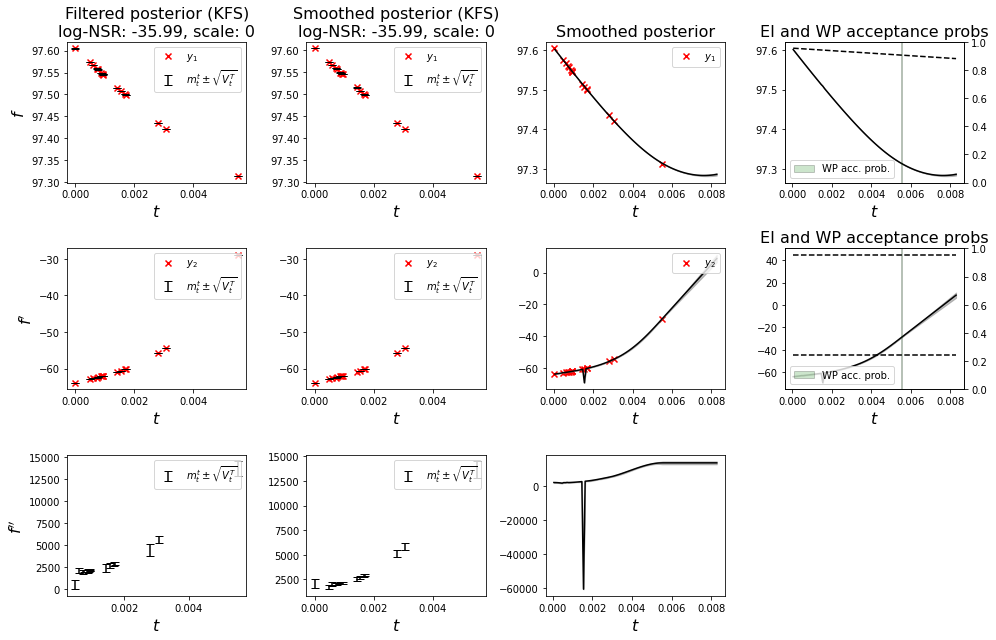

evidence [110.97694844]


In [21]:
i = 6

names = ['t', 'y', 'wp_probs', 'mf', 'Vf', 'ms', 'Vs', 'iVC', 'post_probs']
loaded = [np.load(f'{os.getcwd()}/{save_path}/{str(i).zfill(5)}/{name}.npy') for name in names]
t, y, wp_probs = loaded[:3]

scale = 0.1

t, y = scale_data(t, y, scale)

log_desired_nsr = -10.
log_nsr = log_desired_nsr + 5 * np.log(np.max(t) - np.min(t))

mf, Vf, ms, Vs, iVC, theta2, nlml = kalman_filter_smoother(t,
                                                           y,
                                                           log_nsr_grid=np.array([log_nsr]),
                                                           verbose=True)

plot_linesearch(c1=c1,
                c2=c2,
                t_data=t,
                mf=mf,
                Vf=Vf,
                ms=ms,
                Vs=Vs,
                iVC=iVC,
                post_probs=np.array([1.]),
                wp_probs=wp_probs,
                x=None,
                y=y,
                options={'kfs_info'  : f'log-NSR: {log_nsr:.2f}, scale: {scale:.0f}',
                         'save_path' : f'figures/{log_nsr:.2f}_{scale:.0f}.pdf'})

print(f'evidence {-nlml[0]}')
# diff [0.00152318 1.07406326]
# quad [107.11845063]
# diff [-7.05007756e-05  5.39869149e-01]
# quad [1.65557898e+08]
# diff [0.00216854 1.52950542]
# quad [2.49449633e+08]

In [16]:
Vs[0][0]

array([[ 2.58461576e-08,  0.00000000e+00, -4.38077449e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.38077449e-05,  0.00000000e+00,  2.16422184e+01]])

In [22]:
Vs[0][0]

array([[ 2.58461576e-08,  0.00000000e+00, -4.38077449e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.38077449e-03,  0.00000000e+00,  2.16422184e+05]])

-96.8312210972652
5.676249629259094e-18 6.4169179326296e+24


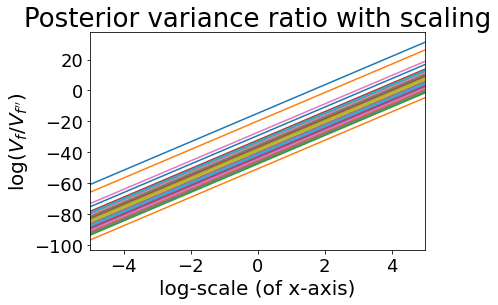

In [107]:
cs = []

for i in range(100):
    
    scales = 10 ** np.linspace(-5., 5, 11)

    names = ['t', 'y', 'wp_probs', 'mf', 'Vf', 'ms', 'Vs', 'iVC', 'post_probs']
    loaded = [np.load(f'{os.getcwd()}/{save_path}/{str(i).zfill(5)}/{name}.npy') for name in names]
    t, y, wp_probs = loaded[:3]

    log_ratios = np.zeros(shape=(scales.shape[0], 2))

    for i, scale in enumerate(scales):

        t_, y_ = scale_data(t, y, scale)

        log_desired_nsr = -20.
        log_nsr = log_desired_nsr + 5 * np.log(np.max(t_) - np.min(t_))

        mf, Vf, ms, Vs, iVC, theta2, nlml = kalman_filter_smoother(t_,
                                                                   y_,
                                                                   log_nsr_grid=np.array([log_nsr]),
                                                                   verbose=True)
        
#         plot_linesearch(c1=c1,
#                         c2=c2,
#                         t_data=t_,
#                         mf=mf,
#                         Vf=Vf,
#                         ms=ms,
#                         Vs=Vs,
#                         iVC=iVC,
#                         post_probs=np.array([1.]),
#                         wp_probs=wp_probs,
#                         x=None,
#                         y=y_,
#                         options={'kfs_info'  : f'log-NSR: {log_nsr:.2f}, scale: {scale}',
#                                  'save_path' : f'figures/{log_nsr:.2f}_{scale}.pdf'})

        log_ratios[i, 0] = np.log(Vs[0][0][0, 0]) - np.log(Vs[0][0][2, 2])
        log_ratios[i, 1] = np.log(Vs[0][1][0, 0]) - np.log(Vs[0][1][2, 2])
        
        if log_ratios[i, 0] < -95:
            print(log_ratios[i, 0])
            print(Vs[0][0][0, 0], Vs[0][0][2, 2])

    m = (log_ratios[-1, 0] - log_ratios[0, 0]) / (np.log(scales)[-1] - np.log(scales)[0])
    c = log_ratios[-1, 0] - m * np.log(scales)[-1]
#     print(m)
#     print(Vs[0][0][0, 0])
    plt.plot(np.log10(scales), log_ratios[:, 0])
    cs.append(c)
    
    
plt.title('Posterior variance ratio with scaling', fontsize=26)
plt.xlabel('log-scale (of x-axis)', fontsize=20)
plt.ylabel("log$(V_{f} / V_{f''})$", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([-5, 5])
plt.show()

(array([ 2., 20., 35., 25., 13.,  2.,  1.,  0.,  1.,  1.]),
 array([-55.896375  , -52.2846425 , -48.67291   , -45.0611775 ,
        -41.44944499, -37.83771249, -34.22597999, -30.61424749,
        -27.00251499, -23.39078249, -19.77904999]),
 <a list of 10 Patch objects>)

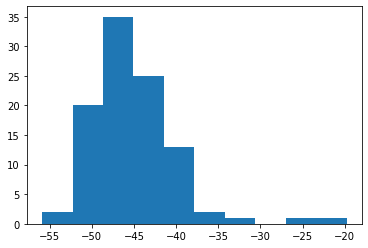

In [108]:
plt.hist(cs)

# Notes

- Fix scaling.
- Add second scaling for numerical stability.